In [1]:
# sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[0])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')



# libraries
import pandas as pd
import numpy as np

import scipy.linalg
import matplotlib.pyplot as plt

from gp_regression import GPR
from gp_ccopf import GP_CCOPF
import save_outputs
import time

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# DataSet

In [2]:
# Data Set
df = pd.read_csv('datasets\dataset_pandapower.csv')
df.head()

,Unnamed: 0,Pg0,Pg1,Pg2,Pg3,Pg4,Pg5,Pg6,Pg7,Pg8,Pg9,Load_P1,Load_P2,Load_P3,Load_P4,Load_P5,Load_P6,Load_P7,Load_P8,Load_P9,Load_P10,Load_P11,Load_P12,Load_P13,Load_P14,Load_P15,Load_P16,Load_P17,Load_P18,Load_P19,Load_P20,Load_P21,Load_Q1,Load_Q2,Load_Q3,Load_Q4,Load_Q5,Load_Q6,Load_Q7,Load_Q8,Load_Q9,Load_Q10,Load_Q11,Load_Q12,Load_Q13,Load_Q14,Load_Q15,Load_Q16,Load_Q17,Load_Q18,Load_Q19,Load_Q20,Load_Q21,RS_P1,RS_P2,RS_P3,RS_P4,RS_P5,RS_P6,RS_Q1,RS_Q2,RS_Q3,RS_Q4,RS_Q5,RS_Q6,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20,U21,U22,U23,U24,U25,U26,U27,U28,P_0_1,P_0_38,P_1_2,P_1_24,P_2_3,P_2_17,P_3_4,P_3_13,P_4_5,P_4_7,P_5_6,P_5_10,P_6_7,P_7_8,P_8_38,P_9_10,P_9_12,P_12_13,P_13_14,P_14_15,P_15_16,P_15_18,P_15_20,P_15_23,P_16_17,P_16_26,P_20_21,P_21_22,P_22_23,P_22_35,P_24_25,P_25_26,P_25_27,P_25_28,P_27_28
0,0,543.683861,480.780962,422.589181,515.193702,465.726434,398.126985,407.492184,438.353382,470.090281,474.440983,90.914192,278.257547,484.890806,191.941725,434.717963,5.701385,7.723471,280.393552,294.915708,144.022588,619.300718,248.616210,237.842081,292.766489,207.294727,122.702763,244.951684,195.564458,269.750389,7.756971,1067.487076,41.172206,2.073969,178.439817,68.961099,147.071250,-58.417271,79.679422,134.063167,28.953731,27.346061,93.805844,104.346220,81.298748,-87.469444,43.679960,15.006813,65.814420,26.201840,25.595363,3.878486,241.731675,201.939244,186.743432,171.992000,155.919662,253.889380,180.249926,67.313081,62.247811,57.330667,51.973221,84.629793,60.083309,-97.245241,-125.249374,-87.828262,-26.192747,-121.630562,-63.966173,-14.113978,44.594445,119.362797,132.576888,1.036330,1.062366,1.050512,1.026598,1.025230,1.026894,1.017673,1.016540,1.041671,1.037964,1.034193,1.039224,1.037821,1.037297,1.049800,1.060694,1.059722,1.055139,1.062034,0.998821,1.057377,1.068149,1.063188,1.069653,1.065750,1.073446,1.062809,1.071468,1.069576,-446.072007,355.157815,353.544169,-123.383733,135.603873,-61.800089,-51.929770,-297.719713,-453.478557,401.526746,474.814290,-396.796605,281.551854,246.800549,239.617760,300.379826,122.209355,203.098223,-95.668618,-204.266790,288.185103,-355.725130,-235.824246,-196.241467,206.146955,81.521045,-484.849331,67.504248,236.381820,-406.757379,105.405929,163.890125,-67.209717,-114.323150,-262.947709
1,1,536.484387,547.951193,477.059316,470.671430,569.117091,440.880892,548.190410,603.776581,650.451261,598.786405,108.212196,366.011893,599.722807,243.260219,596.746247,7.403969,10.074933,373.254003,377.338547,188.271444,748.880865,268.522571,280.726052,340.867608,238.451631,157.474964,305.898926,223.975171,312.723399,10.007058,1209.309080,49.005933,2.728039,220.697993,87.398881,201.887715,-75.862208,103.938349,178.462070,37.045699,35.747742,113.433425,112.701079,95.957269,-101.840549,50.245165,19.259528,82.189925,30.008324,29.672873,5.003529,273.847165,374.974885,216.516176,209.977880,328.995585,202.538118,237.571862,124.991628,72.172059,69.992627,109.665195,67.512706,79.190621,-155.705930,-196.957456,-165.711546,-70.372389,-163.112166,-102.193941,-59.125669,6.617990,71.855892,65.285740,1.026874,1.053094,1.032643,1.004095,1.005054,1.007839,0.995471,0.994056,1.036013,1.022229,1.016963,1.018713,1.020679,1.017581,1.030161,1.045033,1.042669,1.037110,1.055150,0.992159,1.044897,1.063146,1.055219,1.054157,1.060358,1.059099,1.044896,1.061353,1.063054,-535.056085,426.843889,602.339887,-224.014487,277.785890,-45.866380,11.228432,-334.308754,-468.752007,479.978902,558.565468,-488.789839,313.386853,194.351398,185.732984,374.961711,102.097605,192.078070,-143.485948,-307.155271,221.121345,-284.799691,-400.004073,-221.754352,234.541353,-13.734384,-669.707577,96.846686,362.881792,-546.846719,135.478053,320.999974,-145.009345,-198.511163,-369.796724
2,2,474.376160,519.312942,435.221241,543.465098,471.367214,584.793955,444.998575,616.119147,425.730377,596.925906,99.077568,343.352262,500.972571,254.061595,540.522773,7.090723,9.230939,323.001731,334.107739,15

In [3]:
df.describe()

,Unnamed: 0,Pg0,Pg1,Pg2,Pg3,Pg4,Pg5,Pg6,Pg7,Pg8,Pg9,Load_P1,Load_P2,Load_P3,Load_P4,Load_P5,Load_P6,Load_P7,Load_P8,Load_P9,Load_P10,Load_P11,Load_P12,Load_P13,Load_P14,Load_P15,Load_P16,Load_P17,Load_P18,Load_P19,Load_P20,Load_P21,Load_Q1,Load_Q2,Load_Q3,Load_Q4,Load_Q5,Load_Q6,Load_Q7,Load_Q8,Load_Q9,Load_Q10,Load_Q11,Load_Q12,Load_Q13,Load_Q14,Load_Q15,Load_Q16,Load_Q17,Load_Q18,Load_Q19,Load_Q20,Load_Q21,RS_P1,RS_P2,RS_P3,RS_P4,RS_P5,RS_P6,RS_Q1,RS_Q2,RS_Q3,RS_Q4,RS_Q5,RS_Q6,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20,U21,U22,U23,U24,U25,U26,U27,U28,P_0_1,P_0_38,P_1_2,P_1_24,P_2_3,P_2_17,P_3_4,P_3_13,P_4_5,P_4_7,P_5_6,P_5_10,P_6_7,P_7_8,P_8_38,P_9_10,P_9_12,P_12_13,P_13_14,P_14_15,P_15_16,P_15_18,P_15_20,P_15_23,P_16_17,P_16_26,P_20_21,P_21_22,P_22_23,P_22_35,P_24_25,P_25_26,P_25_27,P_25_28,P_27_28
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,550.272309,529.972943,507.509598,514.919115,512.809903,517.409604,516.063560,511.371020,514.683172,555.209822,97.642640,323.536771,499.921031,234.820984,522.422512,6.535098,8.580911,321.833408,330.563879,158.205702,681.584808,275.702305,247.972927,309.854509,223.367374,139.313320,282.688639,206.223332,283.952065,9.237151,1111.336266,44.219310,2.411454,183.970939,84.366821,176.742942,-66.959615,88.525222,153.876598,32.453536,30.039057,103.240052,115.714471,84.761655,-92.574808,47.066697,17.038320,75.953709,27.629922,26.942894,4.618576,251.661292,181.184842,183.585544,182.693730,184.384596,181.098526,177.104283,60.394947,61.195181,60.897910,61.461532,60.366175,59.034761,-139.486539,-170.061279,-141.401523,-60.922717,-148.111223,-118.976426,-54.849748,16.896003,91.149968,106.074780,1.032878,1.055806,1.040182,1.014643,1.013469,1.015605,1.004368,1.003255,1.038037,1.028384,1.023756,1.026394,1.027411,1.025605,1.036510,1.048775,1.048057,1.043726,1.056821,0.994522,1.046105,1.061558,1.055652,1.056771,1.060881,1.064717,1.051518,1.065736,1.065416,-449.822569,352.179929,408.626342,-154.085127,150.815266,-67.837012,-28.138791,-321.435721,-473.846771,445.683957,528.680983,-461.227207,292.145769,213.448618,205.571257,365.267819,142.241779,218.882955,-103.837665,-243.251816,322.752700,-339.497403,-351.550669,-206.172118,226.468971,95.567792,-628.206544,70.616878,337.419211,-514.833970,130.388971,187.830525,-73.902909,-123.428467,-280.394544
std,144.481833,97.737435,95.930804,90.230670,86.946043,92.483111,89.530007,87.363869,89.303999,88.222052,93.223187,11

In [4]:
def _get_x(df):
    X = df[['Pg0', 'Pg1', 'Pg2', 'Pg3', 'Pg4', 'Pg5', 'Pg6', 'Pg7', 'Pg8', 'Pg9',
            'Load_P1', 'Load_P2', 'Load_P3', 'Load_P4', 'Load_P5', 'Load_P6','Load_P7', 'Load_P8', 'Load_P9',
            'Load_P10', 'Load_P11', 'Load_P12', 'Load_P13', 'Load_P14', 'Load_P15','Load_P16', 'Load_P17', 'Load_P18',
            'Load_P19', 'Load_P20', 'Load_P21', 'RS_P1', 'RS_P2', 'RS_P3', 'RS_P4', 'RS_P5', 'RS_P6']]
    return X 


def _get_y(df):
    y = df[['U0', 'U1','U2', 'U3', 'U4', 'U5', 'U6','U7', 'U8','U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16',
            'U17', 'U18','U19', 'U20', 'U21', 'U22', 'U23','U24', 'U25','U26', 'U27', 'U28',
            'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
            'P_0_1', 'P_0_38', 'P_1_2', 'P_1_24', 'P_2_3', 'P_2_17', 'P_3_4', 'P_3_13', 'P_4_5', 'P_4_7', 'P_5_6', 'P_5_10', 'P_6_7',
            'P_7_8', 'P_8_38', 'P_9_10', 'P_9_12', 'P_12_13', 'P_13_14', 'P_14_15', 'P_15_16', 'P_15_18', 'P_15_20', 'P_15_23', 'P_16_17', 'P_16_26',
            'P_20_21', 'P_21_22','P_22_23', 'P_22_35', 'P_24_25', 'P_25_26', 'P_25_27', 'P_25_28', 'P_27_28']]
    return y 


X = _get_x(df)
Y = _get_y(df)

Y[['U0', 'U1','U2', 'U3', 'U4', 'U5', 'U6','U7', 'U8','U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16',
   'U17', 'U18','U19', 'U20', 'U21', 'U22', 'U23','U24', 'U25','U26', 'U27', 'U28']]  = Y[['U0', 'U1','U2', 'U3', 'U4', 'U5', 'U6','U7', 'U8','U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16',
                                           'U17', 'U18','U19', 'U20', 'U21', 'U22', 'U23','U24', 'U25','U26', 'U27', 'U28']]*345

In [5]:
Nu = 10
Nd = 27

n_train = 200
n_test = n_train + 65

X_train = X.iloc[:n_train]  
Y_train = Y.iloc[:n_train]
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()


X_test = X.iloc[n_train:n_test]
Y_test = Y.iloc[n_train:n_test]
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

# GP - Train and Save model

In [6]:
model = 1


print('*****************')
print('GP')
print('*****************')

#Train
if model==0:
    gp = GPR(X_train, Y_train, normalize=True)
    gp.save_model('models/IEEE39')

#Load    
elif model==1:
    gp = GPR.load_model('models/IEEE39')


print('*****************')
print('Hyper_parameters')
print('*****************')
gp.print_hyper_parameters()

*****************
GP
*****************
*****************
Hyper_parameters
*****************

________________________________________
# Hyper-parameters
----------------------------------------
* Num samples: 200
* Ny: 74
* Nx: 37
* Normalization: True
----------------------------------------
* Lengthscale:  0
-- l0: 24.29606351008033
-- l1: 19.09190998559909
-- l2: 24.83352264306643
-- l3: 67.95099796116872
-- l4: 62.80449725142784
-- l5: 55.06168266187872
-- l6: 45.168225325029034
-- l7: 14.400288590134117
-- l8: 29.452679204370202
-- l9: 8.856607324478693
-- l10: 20.7468781750401
-- l11: 70.56756085410791
-- l12: 31.67594367692733
-- l13: 44.17863969039812
-- l14: 17.96480082141666
-- l15: 67.11762867280932
-- l16: 61.52557507105649
-- l17: 60.35898189276474
-- l18: 62.502838368563594
-- l19: 52.74111377418256
-- l20: 56.25102547932903
-- l21: 61.540696449424864
-- l22: 72.80091473969296
-- l23: 58.324955625816266
-- l24: 60.74454440124882
-- l25: 64.63470740991436
-- l26: 64.750466

-- sf2: 2.707524019512753
* Noise variance:  26
-- sn2: 1.0000000000000001e-20
----------------------------------------
* Lengthscale:  27
-- l0: 47.335615883177034
-- l1: 14.75151941077408
-- l2: 42.78895439204904
-- l3: 27.138530439056684
-- l4: 38.89181111235025
-- l5: 16.21435825658189
-- l6: 15.659990278102065
-- l7: 18.27152665724075
-- l8: 5.418421522404835
-- l9: 58.05134228386938
-- l10: 66.856508038834
-- l11: 58.28319313746234
-- l12: 49.61614586298817
-- l13: 73.90205918650814
-- l14: 30.18741255325597
-- l15: 54.39173208578518
-- l16: 55.54863135555785
-- l17: 39.465785271202016
-- l18: 61.21344156836432
-- l19: 48.67933801150517
-- l20: 32.55156659806507
-- l21: 65.23158612303943
-- l22: 41.55344322567962
-- l23: 60.65148066592655
-- l24: 50.58444278865324
-- l25: 46.81158593773074
-- l26: 19.638156149139554
-- l27: 15.799002272764543
-- l28: 16.49139325233115
-- l29: 89.47745550740014
-- l30: 58.95262209592602
-- l31: 50.51108172607134
-- l32: 70.65833419463397
-- l33: 3

-- l19: 65.26123236703238
-- l20: 44.10644996812892
-- l21: 62.22292575301341
-- l22: 60.89706953910439
-- l23: 66.07180373435898
-- l24: 75.7285419577109
-- l25: 70.76455131165501
-- l26: 63.41779436292897
-- l27: 69.18259738864049
-- l28: 78.82471961194271
-- l29: 74.96560583057298
-- l30: 35.05307422056181
-- l31: 78.13486852101609
-- l32: 44.542789981574636
-- l33: 47.32079889999098
-- l34: 54.58355315666004
-- l35: 61.20936401558714
-- l36: 86.00918015195994
* Signal variance:  57
-- sf2: 24.051659773360036
* Noise variance:  57
-- sn2: 3.641338167583424e-19
----------------------------------------
* Lengthscale:  58
-- l0: 58.77702024784183
-- l1: 109.63833449448238
-- l2: 64.30166139934273
-- l3: 71.21573487194243
-- l4: 79.47091998086428
-- l5: 90.367650689249
-- l6: 73.12958308047942
-- l7: 131.5021713330673
-- l8: 129.61872433200864
-- l9: 104.09579650371282
-- l10: 100.54380177144242
-- l11: 80.30892383183232
-- l12: 76.00989732700071
-- l13: 76.22741458733582
-- l14: 75.398

# GP - Validation

In [7]:
print('*****************')
print('Validation - Validation Data')
print('*****************')

RMSE = gp.validate(X_test, Y_test, case='IEEE39')
print('RMSE:', np.mean(RMSE))

*****************
Validation - Validation Data
*****************

________________________________________
# Validation of GP model 
----------------------------------------
* Num training samples: 200
* Num test samples: 65
----------------------------------------
* Root Mean Squared Error: 
	- State 1: 0.000228
	- State 2: 0.000293
	- State 3: 0.000402
	- State 4: 0.000426
	- State 5: 0.000371
	- State 6: 0.000396
	- State 7: 0.000478
	- State 8: 0.000513
	- State 9: 0.000294
	- State 10: 0.000333
	- State 11: 0.000372
	- State 12: 0.000318
	- State 13: 0.000349
	- State 14: 0.000291
	- State 15: 0.000340
	- State 16: 0.000297
	- State 17: 0.000437
	- State 18: 0.000445
	- State 19: 0.000127
	- State 20: 0.000076
	- State 21: 0.000219
	- State 22: 0.000148
	- State 23: 0.000165
	- State 24: 0.000298
	- State 25: 0.000248
	- State 26: 0.000333
	- State 27: 0.000469
	- State 28: 0.000201
	- State 29: 0.000127
	- State 30: 0.003972
	- State 31: 0.005270
	- State 32: 0.004671
	- State 33

# Input parameters

In [8]:
# Input mean
Xd = np.array([[ 97.6,  322.,  500., 233.8,   522.,   6.5,   8.53,   320.,  329., 158.,  680.,   274.,   247.5,  308.6,
                 224.,  139.,  281.,  206.,  283.5,   9.2,  1104., 
                 210., 210., 210., 210.,  210.,  210. ]])

# Participation factors
alpha = np.array([[0.117, 0.117, 0.117, 0.117, 0.0178, 0.1173, 0.0883, 0.0726, 0.117, 0.117]]).T

# Costs
R = np.eye(Nu) * [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
R2 = np.ones(Nu) * [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

# Control boundaries
ulb = [   0,    0,   0,   0,   0,   0,   0,   0,   0,    0]
uub = [ 646, 1040, 725, 652, 508, 687, 580, 564, 865, 1100]

# Output boundaries
xlb = [310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5,
       310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5, 310.5,
       310.5, 
      -500,  -500.,  -500.,  -500.,  -500.,  -500.,   -500.,  -500.,  -500., -500.,
      -2000, -2000,  -2000,  -2000,  -2000,  -2000,   -2000,  -2000,  -2000, -2000,  -2000,  -2000,  -2000,  -2000,  
      -2000, -2000,  -2000,  -2000,  -2000,  -2000,   -2000,  -2000,  -2000, -2000,  -2000,  -2000,  -2000,  -2000,
      -2000, -2000,  -2000,  -2000,  -2000,  -2000,   -2000
           ]
           
xub = [379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 
       379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5, 379.5,
       379.5,
       500,    500.,   500.,   500.,   500.,   500.,    500.,   500.,   500.,  500.,
       2000,   2000,   2000,   2000,   2000,   2000,    2000,   2000,   2000,  2000,   2000,   2000,   2000,   2000,  
       2000,   2000,   2000,   2000,   2000,   2000,    2000,   2000,   2000,  2000,   2000,   2000,   2000,   2000,
       2000,   2000,   2000,   2000,   2000,   2000,    2000
          ]

# Percentages
per_load = 0.15 
per_rs   = 0.3 
n_load   = 21

# Approximation models

## TA1

In [9]:
gp_opf_TA1 = GP_CCOPF(gp=gp, gp_method='TA1', predefine_probability_y=0.975, predefine_probability_u=0.999,
                      R=R, R2=R2, ulb=ulb, uub=uub, xlb=xlb, xub=xub, solver_opts=None, normalize=True,
                      X=X_train, Y=Y_train, Xd=Xd, alpha=alpha, per_load=per_load, per_rs=per_rs, n_load=n_load)        

----------------------------------------
# Time to build GP CCOPF solver: 6.533553 sec


In [10]:
u_TA1, alpha_TA1, x_TA1, s_TA1, trace_covar_TA1, Xd_std = gp_opf_TA1.solve()

# Save outputs
gp_save = 0

if gp_save == 0:
    IEEE_dict = save_outputs.to_dict(x_TA1, s_TA1, u_TA1, alpha_TA1, trace_covar_TA1)
    save_outputs.save_model(IEEE_dict, 'outputs\IEEE39_TA1')


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:      168
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      150
Total number of inequality constraints...............:      252
        inequality constraints with only lower bounds:      168
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       84


Number of Iterations....: 18

    

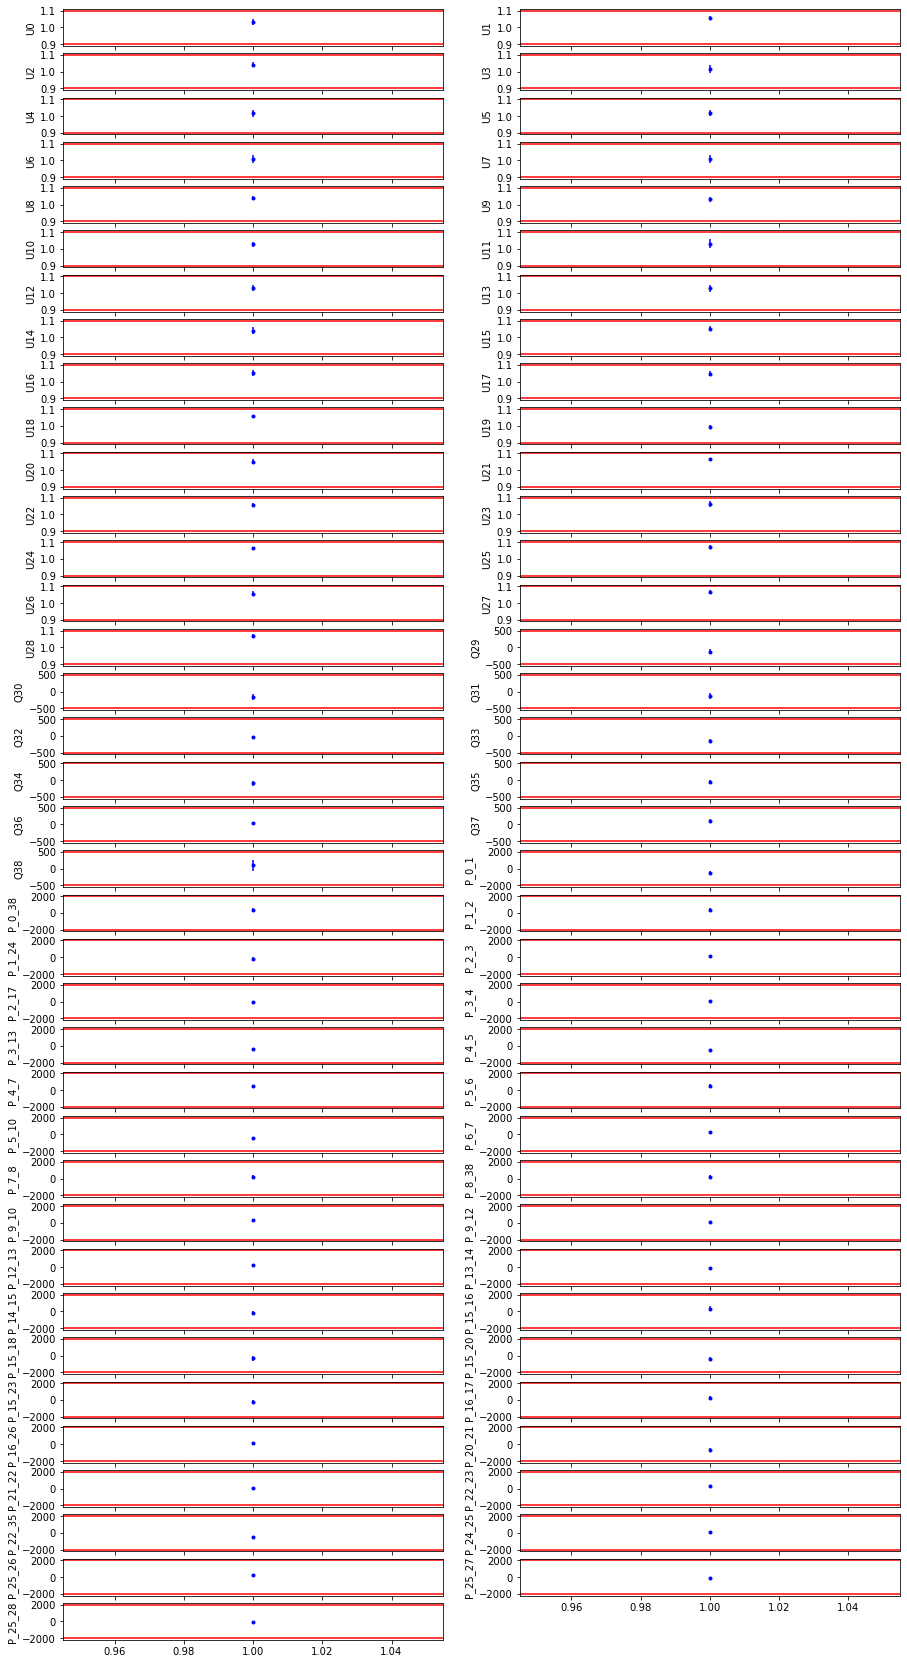

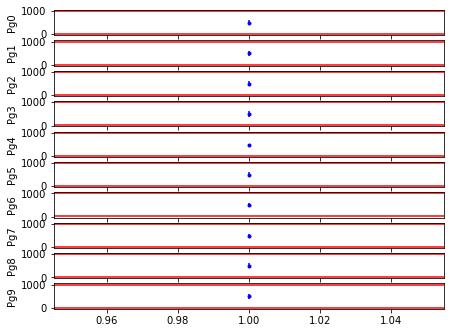

In [11]:
# Save inputs
gp_in_save = 0

if gp_in_save == 0:
    IEEE_dict_in = save_outputs.to_dict_in(Xd, Xd_std, u_TA1, alpha_TA1)
    save_outputs.save_model(IEEE_dict_in, 'IEEE39 - pandapower\inputs\IEEE39_TA1')


x_names = ['U0', 'U1','U2', 'U3', 'U4', 'U5', 'U6','U7', 'U8','U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16',
            'U17', 'U18','U19', 'U20', 'U21', 'U22', 'U23','U24', 'U25','U26', 'U27', 'U28',
            'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34','Q35', 'Q36', 'Q37', 'Q38',
            'P_0_1', 'P_0_38', 'P_1_2', 'P_1_24', 'P_2_3', 'P_2_17', 'P_3_4', 'P_3_13', 'P_4_5', 'P_4_7', 'P_5_6', 'P_5_10', 'P_6_7',
            'P_7_8', 'P_8_38', 'P_9_10', 'P_9_12', 'P_12_13', 'P_13_14', 'P_14_15', 'P_15_16', 'P_15_18', 'P_15_20', 'P_15_23', 'P_16_17', 'P_16_26',
            'P_20_21', 'P_21_22','P_22_23', 'P_22_35', 'P_24_25', 'P_25_26', 'P_25_27', 'P_25_28', 'P_27_28']
u_names = ['Pg0', 'Pg1', 'Pg2', 'Pg3', 'Pg4', 'Pg5', 'Pg6', 'Pg7', 'Pg8', 'Pg9']
d_names = ['Load_P1', 'Load_P2', 'Load_P3', 'Load_P4', 'Load_P5', 'Load_P6','Load_P7', 'Load_P8', 'Load_P9',
            'Load_P10', 'Load_P11', 'Load_P12', 'Load_P13', 'Load_P14', 'Load_P15','Load_P16', 'Load_P17', 'Load_P18',
            'Load_P19', 'Load_P20', 'Load_P21', 'RS_P1', 'RS_P2', 'RS_P3', 'RS_P4', 'RS_P5', 'RS_P6']


gp_opf_TA1.plot(x_names=x_names, u_names=u_names, vol_nom=345, x_w=15, x_h=30, u_w=7, u_h=15, system='IEEE39')

## TA2

In [12]:
gp_opf_TA2 = GP_CCOPF(gp=gp, gp_method='TA2', predefine_probability_y=0.95, predefine_probability_u=0.999,
                      R=R, R2=R2, ulb=ulb, uub=uub, xlb=xlb, xub=xub, solver_opts=None, normalize=True,
                      X=X_train, Y=Y_train, Xd=Xd, alpha=alpha, per_load=per_load, per_rs=per_rs, n_load=n_load)        

----------------------------------------
# Time to build GP CCOPF solver: 83.620893 sec


In [ ]:
u_TA2, alpha_TA2, x_TA2, s_TA2, trace_covar_TA2, _ = gp_opf_TA2.solve()

# Save outputs
gp_save = 0

if gp_save == 0:
    IEEE_dict = save_outputs.to_dict(x_TA2, s_TA2, u_TA2, alpha_TA2, trace_covar_TA2)
    save_outputs.save_model(IEEE_dict, 'outputs\IEEE39_TA2')

## EM

In [13]:
gp_opf_EM = GP_CCOPF(gp=gp, gp_method='EM', predefine_probability_y=0.95, predefine_probability_u=0.999,
                      R=R, R2=R2, ulb=ulb, uub=uub, xlb=xlb, xub=xub, solver_opts=None, normalize=True,
                      X=X_train, Y=Y_train, Xd=Xd, alpha=alpha, per_load=per_load, per_rs=per_rs, n_load=n_load)        

----------------------------------------
# Time to build GP CCOPF solver: 53.472399 sec


In [ ]:
u_EM, alpha_EM, x_EM, s_EM, trace_covar_EM, _ = gp_opf_EM.solve()

# Save outputs
gp_save = 0

if gp_save == 0:
    IEEE_dict = save_outputs.to_dict(x_EM, s_EM, u_EM, alpha_EM, trace_covar_EM)
    save_outputs.save_model(IEEE_dict, 'outputs\IEEE9_EM')